# Tarefa - Algoritmo Genético

## Problema das N-Rainhas

### Dupla:
João Pedro de Paula Oliveira - DRE: 113054857

Rafael da Silva Fernandes - DRE: 117196229

##1. **Modelagem do Indivíduo**

### (a) Utilize a mesma representação de tabuleiro usada na tarefa do Hill Climbing.

Um tabuleiro com N rainhas será representado por meio de uma lista. 

Por exemplo, a lista [3,2,1,2] representa um tabuleiro 4 x 4, em que o índice 0 da lista significa que na primeira coluna, contando da esquerda para a direita, há uma rainha na quarta linha, contando de cima para baixo. 

Dessa forma, os valores possíveis da lista vão de 0 até (N - 1).

###(b) Proponha uma representação binária para o tabuleiro.

Como a dimensão de tabuleiro que usaremos na tarefa é N = 2^T, vamos considerar a representação binária de cada indivíduo um número na base 2 com N*T bits, onde T é a quandidade de bits que cada elemento que compõe o indivíduo possui e N é o valor das dimensões do tabuleiro e o número total de rainhas.

Utilizando a lista [3,2,1,2] citada no item acima como exemplo, o indivíduo seria 11100110. O tabuleiro tem dimensão N = 2^2 = 4, então o indivíduo é formado por 4 elementos de 2 bits, 11 10 01 e 10, que são as representações binárias de 3, 2, 1 e 2. As posições i, para as quais (i mod T = 1), indicam o início de outro elemento da lista na representação em base 10.

Agora considerando um tabuleiro de tamanho 8, temos que T = 3 e N = 8, pois 2^3 = 8. Usando a lista [0,4,6,3,5,6,1,7] como base, temos o indivíduo correspondente sendo 000010110011101110001111, que são 8 elementos de 3 bits cada. Note que nas posições 1, 4, 7, 10, 13, 16, 19 e 22 temos o início de um novo elemento da lista original, pois estes índices são verdade para a expressão (i mod 3 = 1).

## Implementação

In [190]:
# N = 4
N = 8
# N = 16
# N = 32

In [191]:
import random

def monta_tabuleiro(N):

    tabuleiro = []

    # Gera uma lista de tamanho N, com valores de 0 a (N-1)
    # indicando as posições das rainhas, contando de cima para baixo
    for i in range(N):
        tabuleiro.append(random.randint(0, (N - 1)))

    return tabuleiro


# tabuleiro = monta_tabuleiro(N)
# print("Vamos trabalhar com o tabuleiro: " + str(tabuleiro))

In [192]:
# Essa função converte a representação decimal de um tabuleiro para sua representação
# binária.

import math

def tabuleiro_para_binario(tabuleiro):

    n = int(math.log(N, 2))
    individuo = ""

    for i in range(len(tabuleiro)):

        elemento_tabuleiro = tabuleiro[i]

        # print((n - len(bin(elemento_tabuleiro)[2:])) * "0" + bin(elemento_tabuleiro)[2:])
        individuo += (n - len(bin(elemento_tabuleiro)[2:])) * "0" + bin(elemento_tabuleiro)[2:]
        
    return individuo


# print("O tabuleiro " + str(tabuleiro) + " possui a seguinte representação em binário: " 
#       + str(tabuleiro_para_binario(tabuleiro)))

##2. **Geração População Inicial**

### Defina uma função que dado o tamanho n de uma população, gera aleatoriamente um conjunto de n indivíduos. A função deve funcionar para os dois tipos de indivíduos definidos no item anterior.

In [193]:
# Essa função faz tamanho_populacao chamadas da função monta_tabuleiro, adicionando os
# tabuleiros criados no array "pop_inicial_lista"
# Recebe como parâmetros o número de indivíduos da população e
# o tamanho do tabuleiro.

def cria_pop_inicial_lista(tamanho_populacao, N):

    pop_inicial_lista = []
    pop_inicial_binaria = []

    for i in range(tamanho_populacao):
        pop_inicial_lista.append(monta_tabuleiro(N))
  
    return pop_inicial_lista


# pop_inicial_lista = cria_pop_inicial_lista(10, N)
# pop_inicial_lista

In [194]:
# Essa função percorre todos os elementos da versão em lista da população
# inicial e os converte para a representação binária, guardando os elementos
# no array "pop_inicial_binaria"

import math

def cria_pop_inicial(N, populacao, tipo_representacao):

  # Preciso saber quantos bits têm os elementos que irão compor o indivíduo
  bits = str(int(math.log2(N)))

  # Será minha variável de saída no return
  pop_inicial_binaria = []

  # Instancio localmanente a variável global
  pop_inicial = populacao

  # Minha população é composta de indivíduos
  for individuo in pop_inicial:

    # reinicializo o array para a próxima iteração
    array_temp = []

    # Meus indivíduos são compostos por colunas. Aqui converto o valor de cada
    # coluna de int para a string da representação binária
    for coluna in individuo:
    
      # format é um método de string, converte arg[0] para o formato de arg[1],
      # que defini como sendo um binário de "bits" casas.
      elemento_binario = format(coluna, '0' + bits + 'b')

      # array_temp só serve para guardar todos os elementos convertidos no loop.
      # Por enquanto, eu ainda tenho um array de representações binárias, mas 
      # meu indivíduo deveria ser apenas uma string só. Ao sair do for, os 
      # elementos da lista serão unidos nessa única string.
      array_temp.append(elemento_binario)
    
    # Saí do for mais interno, agora posso unir todos os elementos em um único
    # indivíduo e colocá-lo no array pop_inicial_binaria. ''.join concatena
    # todos os elementos do array passado como parâmetro com o caractere entre 
    # aspas entre cada elemento, no caso, o caractere que passei é a string vazia
    individuo_binario = ''.join(array_temp)
    pop_inicial_binaria.append(individuo_binario) 

  if tipo_representacao == "decimal":
      return pop_inicial
  elif tipo_representacao == "binario":
      return pop_inicial_binaria
      

# binario = cria_pop_inicial(N, pop_inicial_lista, "binario")
# binario

##3. **Operadores: Para os dois tipos de indivíduos definidos acima:**

###(a) Defina a função de adaptação usada para avaliar um tabuleiro T.

A função de adaptação está baseada nas funções de ataque utilizadas para a tarefa do Hill Climbing e SA, a única alteração foi a definição da função calcula_f, especificada mais abaixo.

In [195]:
# Caso tenham rainhas na mesma linha, aumenta o valor da variável "ataque"
def checa_linha(tabuleiro):

    ataques = 0

    for coluna in range(len(tabuleiro)):

        linha_rainha = tabuleiro[coluna]

        for coluna_vizinha in range(1, len(tabuleiro) - coluna):

            posicao_coluna_atual = coluna + coluna_vizinha

            if tabuleiro[posicao_coluna_atual] == linha_rainha:
                ataques += 1
    
    return ataques

In [196]:
# Para cada rainha, verifica se há outras rainhas em sua diagonal superior
def checa_diagonal_superior(tabuleiro):

    ataques = 0

    for coluna in range(len(tabuleiro)):

        linha_rainha = tabuleiro[coluna]
        # como há a restrição de apenas uma rainha por coluna, só é preciso verificar as colunas à esquerda
        for coluna_vizinha in range(1, len(tabuleiro) - coluna):

            posicao_coluna_atual = coluna + coluna_vizinha

            if tabuleiro[posicao_coluna_atual] == (linha_rainha - coluna_vizinha):
                ataques += 1
    
    return ataques

In [197]:
# Para cada rainha, verifica se há outras rainhas em sua diagonal inferior
def checa_diagonal_inferior(tabuleiro):

    ataques = 0

    for coluna in range(len(tabuleiro)):

        linha_rainha = tabuleiro[coluna]

        for coluna_vizinha in range(1, len(tabuleiro) - coluna):
            # como há a restrição de apenas uma rainha por coluna, só é preciso verificar as colunas à esquerda
            posicao_coluna_atual = coluna + coluna_vizinha

            if tabuleiro[posicao_coluna_atual] == (linha_rainha + coluna_vizinha):
                ataques += 1
    
    return ataques

In [198]:
# Heurística h(x). Conta a quantidade total de ataques no tabuleiro, fazendo o somatório de todos os ataques possíveis
# nas linhas e diagonais de cada rainha.
def conta_ataques(tabuleiro):

    total_ataques = 0
    ataques_diagonal_total = 0

    ataques_diagonal_superior = checa_diagonal_superior(tabuleiro)
    ataques_diagonal_inferior = checa_diagonal_inferior(tabuleiro)

    ataques_diagonal_total += ataques_diagonal_superior + ataques_diagonal_inferior
    
    total_ataques += checa_linha(tabuleiro) + ataques_diagonal_total

    return total_ataques

In [199]:
# Heurística h(x). Conta a quantidade total de ataques no tabuleiro, fazendo o somatório de todos os ataques possíveis
# nas linhas e diagonais de cada rainha.
def conta_ataques(tabuleiro):

    total_ataques = 0
    ataques_diagonal_total = 0

    ataques_diagonal_superior = checa_diagonal_superior(tabuleiro)
    ataques_diagonal_inferior = checa_diagonal_inferior(tabuleiro)

    ataques_diagonal_total += ataques_diagonal_superior + ataques_diagonal_inferior
    
    total_ataques += checa_linha(tabuleiro) + ataques_diagonal_total

    return total_ataques

In [200]:
# print(checa_linha(tabuleiro))
# print(checa_diagonal_superior(tabuleiro))
# print(checa_diagonal_inferior(tabuleiro))
# print("O total de ataques para o tabuleiro " + str(tabuleiro) 
#       + " é igual à " + str(conta_ataques(tabuleiro)))
# print("Sendo o tabuleiro " + str(tabuleiro) + " o indivíduo "
#       + str(tabuleiro_para_binario(tabuleiro)))


Para nós, quanto mais perto de 0 for um valor da lista_funcao_avaliacao, melhor, pois significa que estamos perto de encontrar uma solução (onde não há ataques entre rainhas), então nossa função de adaptação, ao invés do valor negativo do número de ataques, como era na tarefa do Hill Climbing e SA, foi alterada para (1 / número de ataques + 1), assim quanto mais ataques, menor o valor da função avaliação. Pegamos essa ideia da página 15 do slide 1 de algoritmo genético.

Essas variáveis que mencionei aparecem nas células abaixo.

In [201]:
def calcula_f(tabuleiro):
    return 1/ (conta_ataques(tabuleiro) + 1)

###(b) Defina a função que dada uma população P, constrói a roleta viciada correspondente a P.

In [202]:
def funcao_avaliacao_pop_inicial(populacao):

    lista_populacao = cria_pop_inicial(N, populacao, "decimal")
    lista_funcao_avaliacao = []

    for i in range(len(populacao)):
        # print(calcula_f(lista_populacao[i]))
        lista_funcao_avaliacao.append(calcula_f(lista_populacao[i]))

    return lista_funcao_avaliacao


# lista_funcao_avaliacao = funcao_avaliacao_pop_inicial(3)
# lista_funcao_avaliacao

In [203]:
# Retorna as taxas percentuais do quanto cada indivíduo contribui para o somatório
# total da função de adaptação da população. Este é o método da roleta viciada.

def cria_proporcao_roleta(tamanho_populacao, populacao):

    soma = 0
    lista_proporcao_roleta = []
    lista_funcao_avaliacao = funcao_avaliacao_pop_inicial(populacao)

    for i in range(tamanho_populacao):
        soma += lista_funcao_avaliacao[i]

    for i in range(tamanho_populacao):
        porcentagem = lista_funcao_avaliacao[i]/ soma * 100
        # print(round(porcentagem, 2))
        porcentagem_arredondada = round(porcentagem, 2)
        lista_proporcao_roleta.append(porcentagem_arredondada)
    
    return lista_proporcao_roleta


# lista_proporcao_roleta = cria_proporcao_roleta(3)
# lista_proporcao_roleta

In [204]:
import pandas as pd
import numpy as np


# Cria uma estrutura dicionário para a população.


def cria_dicionario(populacao):
    dicionario_populacao = { i+1 : populacao[i] for i in range(0, len(populacao)) }
    return dicionario_populacao


# Criação do dataframe que exibe para a população, indicando nas colunas o número do indivíduo, 
# sua função de avaliação e proporção na roleta viciada.


def tabela_populacao(populacao, lista_funcao_avaliacao, lista_proporcao_roleta):

    dicionario_populacao = cria_dicionario(populacao)

    populacao_dataframe = pd.DataFrame(lista_funcao_avaliacao)
    populacao_dataframe["Proporção da roleta (%)"] = lista_proporcao_roleta
    populacao_dataframe.index = dicionario_populacao.keys()
    populacao_dataframe.rename_axis("Indivíduo", axis="columns", inplace=True)
    populacao_dataframe.rename(columns= {0: "Função de avaliação"}, inplace=True)
    
    return populacao_dataframe


# tabela_populacao()

In [205]:
# Plota o gráfico de pizza da roleta viciada.
# No código da função do algoritmo genético a chamada está comentada pois os gráficos
# estavam sendo impressos fora da ordem de execução do programa, tornando os resultados
# um pouco confusos de compreender.

import matplotlib.pyplot as plt


def monta_roleta(lista_proporcao_roleta, lista_funcao_avaliacao):

    lista_proporcao_roleta_np_array = np.array(lista_proporcao_roleta)
    plt.figure(1, figsize=(16, 8))
    plt.title('Roleta de proporção', fontsize=24)

    roleta = plt.pie(lista_proporcao_roleta_np_array, 
            labels = np.arange(1, len(lista_funcao_avaliacao) + 1),
            autopct='%1.2f%%')
    
    return roleta


# monta_roleta()

###(c) Defina a função que dada uma população P contrói uma população intermediária correspondente a P. (**seleção**)


In [206]:
# Função para selecionar a população intermediária.

# Ideia:
# Colocar em uma nova lista um número X de vezes que determinado indivíduo aparece com base na sua proporção
# Por exemplo
# O indivíduo 1 possui 10,63% de proporção da roleta
# Transformamos esse 10,63 para int, que se torna 11
# Então, acrescentamos 11 vezes na lista nova o indivíduo 1
# Dessa forma, a lista nova vai ter aproximadamente 100 elementos no final
# E então fazemos um rand dentro dessa lista nova 
# Obtendo assim a população intermediária
# A probabilidade de um indivíduo com maior proporção da roleta ser selecionado se torna natural
# Já que isso significa que ele aparecerá um maior número de vezes na nova lista
# Chamo essa nova lista de populacao_intermediaria para ficar de acordo com os slides

def selecao(tamanho_populacao, populacao):

    populacao_com_base_na_proporcao = []
    populacao_intermediaria = []
    lista_proporcao_roleta = cria_proporcao_roleta(tamanho_populacao, populacao)

    for individuo in range(tamanho_populacao):
        for proporcao in range(int(round(lista_proporcao_roleta[individuo], 0))):
            # print(pop_inicial_lista[individuo])
            populacao_com_base_na_proporcao.append(populacao[individuo])
    
    # print(populacao_com_base_na_proporcao)

    for i in range(tamanho_populacao):
        individuo_aleatorio = random.randint(0, len(populacao_com_base_na_proporcao) - 1)
        populacao_intermediaria.append(populacao_com_base_na_proporcao[individuo_aleatorio])

    return populacao_intermediaria


# selecao(3, pop_inicial_lista)

###(d) Defina a função que faz o crossover entre dois indivíduos. (**crossover**)

In [207]:
# Função que realiza o crossover entre dois indivíduos. A probabilidade de 
# crossover é definida na chamada da função, não no método em si.
# A ideia da função é pegar dois indivíduos, sortear um número entre 1 e 
# len(individuo) -1, pegar a substring de 0 até o indice sorteado e concatenar com
# a substring de indice até fim do outro indivíduo

def crossover(individuoA, individuoB):
  
  # variável de retorno com os indivíduos que sofreram crossover.
  novos_individuos = []

  indice = random.randint(1, len(individuoA)-1)

  substringA_inicio = individuoA[0:indice]
  substringA_fim = individuoA[(indice):]

  substringB_inicio = individuoB[0:indice]
  substringB_fim = individuoB[(indice):]

  crossover1 = substringA_inicio + substringB_fim
  crossover2 = substringB_inicio + substringA_fim

  novos_individuos.append(crossover1)
  novos_individuos.append(crossover2)  

#   print("Índice sorteado: " + str(indice))
#   print("Crossover 1: " + crossover1)
#   print("Crossover 2: " + crossover2)

  return novos_individuos
  

# crossover("00000000", "11111111")

###(e) Defina a função que faz a mutação em um dado indivíduo. (**mutação**)

In [208]:
# Função que realiza a mutação em um dado indivíduo, dada uma taxa percentual
# (entre 1 e 100), a probabilidade de mutação é aplicada sobre cada caractere 
# da string do indivíduo.
# A mutação é feita pegando o módulo da subtração do bit por 1. 
# Para o bit 0: |0 - 1| = | -1 | = 1
# Para o bit 1: |1 - 1| = |  0 | = 0 

def mutacao(individuo, percentual):
    
    novo_individuo = ""
    
    for caractere in individuo:
        sorteio = random.randint(1, 100)
        
        if sorteio <= percentual:
            caractere = str(abs(int(caractere) -1))
            # print("Houve mutação")
    
        # print(caractere)
    
        novo_individuo += caractere
  
    return novo_individuo


# mutacao("0000000000", 1)

## 4. **Algoritmo Genético Básico**

### Implementação

Geração 0

População inicial: [[1, 1, 7, 6, 1, 2, 2, 0], [4, 3, 0, 1, 3, 5, 4, 2], [5, 1, 2, 6, 0, 6, 0, 6], [0, 1, 2, 6, 1, 0, 0, 7], [5, 4, 4, 7, 6, 4, 0, 6], [6, 4, 5, 2, 3, 4, 5, 7], [1, 1, 2, 1, 7, 1, 7, 3], [5, 6, 2, 3, 2, 7, 3, 7], [5, 1, 5, 0, 3, 3, 1, 7], [4, 3, 1, 1, 4, 0, 1, 5], [0, 3, 7, 4, 5, 5, 2, 7], [6, 5, 7, 6, 1, 3, 1, 5], [1, 4, 4, 2, 3, 3, 2, 5], [3, 2, 5, 6, 2, 4, 1, 1], [4, 6, 7, 2, 1, 7, 0, 1], [2, 5, 6, 4, 6, 6, 0, 6], [2, 0, 6, 4, 3, 1, 3, 7], [4, 6, 1, 1, 4, 5, 3, 6], [3, 3, 6, 1, 4, 2, 2, 4], [7, 0, 2, 5, 3, 2, 3, 4]]
Representação binária da população inicial: ['001001111110001010010000', '100011000001011101100010', '101001010110000110000110', '000001010110001000000111', '101100100111110100000110', '110100101010011100101111', '001001010001111001111011', '101110010011010111011111', '101001101000011011001111', '100011001001100000001101', '000011111100101101010111', '110101111110001011001101', '001100100010011011010101', '011010101110010100001001', '10011011101

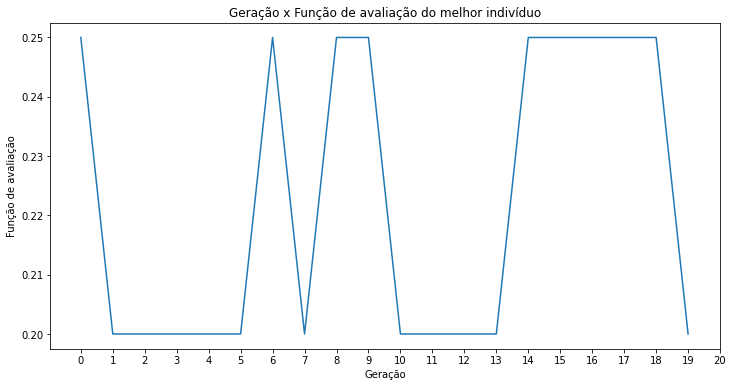

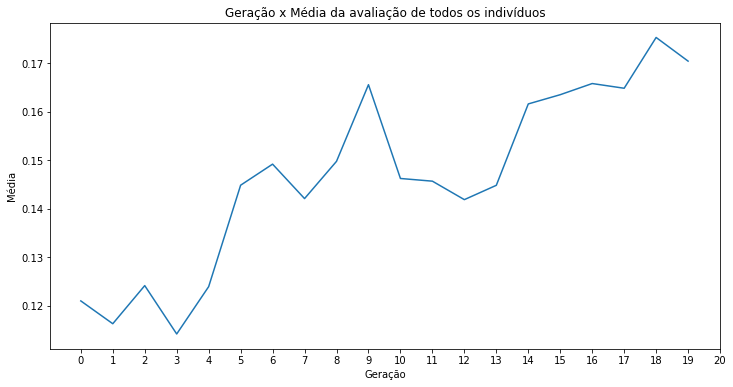

In [213]:
# Código do algoritmo genético em si, recebe como parâmetros o tamanho da população,
# o número de gerações, as probabilidades de crossover e mutação e um booleano indicando
# se o elitismo é utilizado ou não, conforme a descrição do enunciado.

def algoritmo_genetico(tamanho_populacao, numero_geracoes, p_crossover, p_mutacao, elitismo):

    # Lista para próximas gerações
    proxima_populacao = []

    # Lista para guardar a função de avaliação do melhor indivíduo de cada geração
    funcao_avaliacao_melhor_individuo = []

    # Lista para guardar a média da função de avaliação dos indivíduos da geração
    media_avaliacao_geracao = []

    for contador_geracoes in range(numero_geracoes):

        print("==================================================")
        print("Geração " + str(contador_geracoes) + "\n")

        # Caso seja a primeira geração, é criada uma população inicial aleatória,
        # senão, trabalha-se sobre a "próxima população" da iteração anterior.
        if contador_geracoes == 0:

            # Geração da população inicial
            populacao_inicial = cria_pop_inicial_lista(tamanho_populacao, N)
            populacao_inicial_binario = cria_pop_inicial(N, populacao_inicial, "binario")
            
        elif contador_geracoes != 0:
            populacao_inicial = proxima_populacao
            proxima_populacao = []
            proxima_populacao_binario = []

        print("População inicial: " + str(populacao_inicial))
        print("Representação binária da população inicial: " + str(populacao_inicial_binario) + "\n")

        # Criação do dicionário da população inicial
        dicionario_populacao = cria_dicionario(populacao_inicial)

        # Avaliação da população
        lista_funcao_avaliacao = funcao_avaliacao_pop_inicial(populacao_inicial)
        lista_proporcao_roleta = cria_proporcao_roleta(tamanho_populacao, populacao_inicial)

        # Criação da tabela com indivíduos | função de avaliação | proporção da roleta
        populacao_dataframe = tabela_populacao(populacao_inicial, lista_funcao_avaliacao, lista_proporcao_roleta)
        print("Tabela para método da roleta viciada")
        print(populacao_dataframe)
        print("\nSoma de todas as funções de avaliação = " + str(sum(lista_funcao_avaliacao)))
        
        media = sum(lista_funcao_avaliacao)/ len(lista_funcao_avaliacao)
        print("Média de todas as funções de avaliação = " + str(media))
        media_avaliacao_geracao.append(media)

        # Gráfico de pizza (roleta) com indivíduos e suas proporções
        # roleta = monta_roleta(lista_proporcao_roleta, lista_funcao_avaliacao)

        # Elitismo
        # Com elitismo
        if elitismo == True:
            print("\nEstamos trabalhando COM elitismo")

            # Geração da população intermediária
            populacao_intermediaria = selecao(tamanho_populacao - 1, populacao_inicial)
            print("População intermediária: " + str(populacao_intermediaria))

        # Sem elitismo
        else:
            print("\nEstamos trabalhando SEM elitismo")

            # Geração da população intermediária
            populacao_intermediaria = selecao(tamanho_populacao, populacao_inicial)
            print("População intermediária: " + str(populacao_intermediaria))


        # Índices dos invivíduos selecionados para a população intermediária
        chaves_populacao_intermediaria = []
        
        for individuo in populacao_intermediaria:
            for keys, values in dicionario_populacao.items():
                if individuo == values:
                    # print(keys)
                    chaves_populacao_intermediaria.append(keys)
        
        # print("Índices dos indivíduos na população intermediária: " + str(chaves_populacao_intermediaria))

        populacao_intermediaria_binario = cria_pop_inicial(N, populacao_intermediaria, "binario")
        print("Representação binária da população intermediária: " + str(populacao_intermediaria_binario) + "\n")

        # Avalição do melhor indivíduo
        f_melhor_individuo = max(lista_funcao_avaliacao)
        chave_melhor_individuo = populacao_dataframe[populacao_dataframe["Função de avaliação"] == f_melhor_individuo].index.values.astype(int)[0]
        print("Índice melhor indivíduo = " + str(chave_melhor_individuo))

        melhor_individuo = dicionario_populacao[chave_melhor_individuo]
        print("Melhor indivíduo = " + str(melhor_individuo) + "\n")

        funcao_avaliacao_melhor_individuo.append(calcula_f(melhor_individuo))

        # Crossover
        # A chance do crossover acontecer é feita de 2 em 2 elementos na lista.
        populacao_crossover = []

        # Caso a população intermediária tenha um número par de indivíduos. 
        if len(populacao_intermediaria_binario) % 2 == 0:
            
            for individuo in range(0, len(populacao_intermediaria_binario), 2):
                
                probabilidade = random.randint(1, 100)

                # Caso o valor sorteado na variável "probabilidade" seja <= ao
                # parâmetro p_crossover do método, então há crossover.
                if probabilidade <= p_crossover:
                    # print("\nHouve crossover!")
                    lista_auxiliar = crossover(populacao_intermediaria_binario[individuo], populacao_intermediaria_binario[individuo + 1])
                    populacao_crossover.append(lista_auxiliar[0])
                    populacao_crossover.append(lista_auxiliar[1])

                else:
                    # print("\nNão houve crossover!")
                    populacao_crossover.append(populacao_intermediaria_binario[individuo])
                    populacao_crossover.append(populacao_intermediaria_binario[individuo + 1])
        
        # Caso a população intermediária tenha um número ímpar de indivíduos
        # Faremos o crossover dos indivíduos da posição 1 até (tamanho da população - 1)
        # E então acrescentaremos o último indivíduo na população do crossover
        elif len(populacao_intermediaria_binario) % 2 != 0:

            for individuo in range(0, len(populacao_intermediaria_binario) - 1, 2):
                
                probabilidade = random.randint(1, 100)

                if probabilidade <= p_crossover:
                    # print("\nHouve crossover!\n")
                    lista_auxiliar = crossover(populacao_intermediaria_binario[individuo], populacao_intermediaria_binario[individuo + 1])
                    populacao_crossover.append(lista_auxiliar[0])
                    populacao_crossover.append(lista_auxiliar[1])

                else:
                    # print("\nNão houve crossover!\n")
                    populacao_crossover.append(populacao_intermediaria_binario[individuo])
                    populacao_crossover.append(populacao_intermediaria_binario[individuo + 1])

            populacao_crossover.append(populacao_intermediaria_binario[-1])

        print("Resultado crossover: " + str(populacao_crossover))

        # Mutação
        populacao_mutacao = []

        for individuo in populacao_crossover:
            populacao_mutacao.append(mutacao(individuo, p_mutacao))

        print("Resultado mutação: " + str(populacao_mutacao))

        # Geração da próxima população
        proxima_populacao_binario = populacao_mutacao
        melhor_individuo_binario = tabuleiro_para_binario(melhor_individuo)

        # Colocando o melhor indivíduo, sem crossover ou mutação, de volta na população, caso haja elitismo
        if elitismo == True:
            proxima_populacao_binario.append(melhor_individuo_binario)
        
        print("\nRepresentação binária da próxima geração: " + str(proxima_populacao_binario))

        # Convertendo proxima_populacao_binario para decimal. Precisa ser feito pois a próxima iteração
        # trabalha inicialmente com a representação em decimal para calcular a função de adaptação da população
        quantidade_bits = int(math.log2(N))

        for individuo in proxima_populacao_binario:
            lista_individuo = []

            for i in range(len(individuo)):
                if i % quantidade_bits == 0:
                    substring = int(individuo[i : i + quantidade_bits], 2)
                    lista_individuo.append(substring)
            
            proxima_populacao.append(lista_individuo)

        print("Representação em decimal da próxima geração: " + str(proxima_populacao))
        
        # Algoritmo encontrou uma resposta
        if 1 in lista_funcao_avaliacao:
            print("\nSolução encontrada!")
            print("Solução: " + str(populacao_inicial))
            print("Geração: " + str(contador_geracoes))
            print("Melhor indivíduo: " + str(melhor_individuo))
            print("Função de adaptação do melhor indivíduo = " + str(f_melhor_individuo))
            print("Média da função de adaptação na última geração = " + str(media_avaliacao_geracao[-1]) + "\n")
            break

    # Algoritmo não encontrou uma resposta e o número máximo de gerações foi atingido
    if not 1 in lista_funcao_avaliacao:
        print("\nSolução não encontrada. Número máximo de gerações atingido.\n")
        print("Melhor indivíduo: " + str(melhor_individuo))
        print("Função de adaptação do melhor indivíduo = " + str(f_melhor_individuo))
        print("Média da função de adaptação na última geração = " + str(media_avaliacao_geracao[-1]) + "\n")

    # Imprime gráficos caso a população inicial não seja já a solução
    if contador_geracoes != 0:
        # Gráfico geração x função de avaliação do melhor indivíduo de cada geração
        # print("\nFunção de avaliação do melhor indivíduo de cada geração: " + str (funcao_avaliacao_melhor_individuo) + "\n")
        fig_melhor = plt.figure()
        fig_melhor.set_size_inches(12, 6)
        ax_melhor = plt.axes()
        ax_melhor.plot(funcao_avaliacao_melhor_individuo)
        ax_melhor.set_title("Geração x Função de avaliação do melhor indivíduo")
        ax_melhor.set_xlabel("Geração")
        ax_melhor.set_ylabel("Função de avaliação")
        plt.xticks(np.arange(0, len(funcao_avaliacao_melhor_individuo) + 1, 1.0))

        # Gráfico geração x média da função de avaliação dos indivíduos da geração
        # print("\nMédia da função de avaliação de todos os indivíduos de cada geração: " + str(media_avaliacao_geracao) + "\n")
        fig_media = plt.figure()
        fig_media.set_size_inches(12, 6)
        ax_media = plt.axes()
        ax_media.plot(media_avaliacao_geracao)
        ax_media.set_title("Geração x Média da avaliação de todos os indivíduos")
        ax_media.set_xlabel("Geração")
        ax_media.set_ylabel("Média")
        plt.xticks(np.arange(0, len(media_avaliacao_geracao) + 1, 1.0))

        
# Chamada da função
algoritmo_genetico(20, 20, 70, 1, False)

## 5. **Utilizando diferentes valores para os parâmetros de entrada, diferentes representações de indivíduos e diferentes tamanhos de tabuleiro (4,8,16,32), compare e discuta os resultados obtidos.**

[Link da planilha com os resultados](https://docs.google.com/spreadsheets/d/1hqg1jO_DIHlt7SOcaZU7Ae14ruQIQS8zf7Q5BdSQqWI/edit#gid=2117586588)

Primeiramente, separamos os casos de testes para diferentes tamanhos de tabuleiro, com este podendo ter dimensões de 4, 8, 16 ou 32.

Definimos inicialmente o caso base para N = 4:

*   População = 5
*   Número de gerações = 10
*   Probabilidade de crossover = 70
*   Probabilidade de mutação = 1
*   Elisitsmo = False


Foram realizados 5 testes com estes parâmetros, mas não houveram soluções encontradas. Dentre todas as execuções, a média da avaliação do melhor indivíduo na última geração foi 0,366667 e a média dentre as médias de todos os indivíduos na última geração foi 0,333334.

Observamos que no caso base, o melhor indivíduo não era muito melhor do que a média de suas populações, havia pouco ganho em relação ao geral.

Os próximos testes foram realizados com os mesmos parâmetros, porém com elitismo. O algoritmo continuou sem encontrar solução, mas houve uma pequena melhora na média do melhor indivíduo, para 0,395833, mas a média geral da população caiu para 0,313332.

Continuamos a experimentar com os parâmetros especificados acima, alterando apenas um valor por vez, incluindo o tamanho do tabuleiro, e realizando 5 testes para cada experimento. Um teste que realizamos foi deixar o número de gerações com um valor muito grande, para verificar a influência do tamanho da população na taxa de soluções encontradas. A conclusão que obtivemos foi que mesmo com muitas gerações, populações pequenas não eram capazes de encontrar uma solução, e que soluções eram encontradas mais rapidamente para populações maiores.

O elitismo não trouxe melhorias notáveis em relação ao desempenho, mas foi observado que os casos em que o parâmetro era utilizado, as médias da função na última geração eram mais consistentes entre as execuções, enquanto sem elitismo elas variavam mais.

Por fim, o último ponto foi que usando a probabilidade de crossover = 70 e a probabilidade de mutação = 1 encontramos soluções em menos iterações, e que além disso, os valores médios da função de avaliação eram mais altos do que quando o utilizamos probabilidade de crossover = 80 e probabilidade de mutação = 3.

